## Assignment 3: $k$ Nearest Neighbor and Visualization Nora Wiktorowicz

**Do two questions from K and 1 from visualization.**

`! git clone https://github.com/ds4e/knn`

Assignment: Exploratory
! git clone https://github.com/ds4e/visualization

# K Nearest Neighbor

# **Q0.**
**1. What is the difference between regression and classification?**


In machine learning, regression is a statistical method that is utilized when we want to predict numerical or continuous values (such as price). In contrast, classification is used when we want to work with discrete values (yes/no, 2 different categories, etc.).

**2.What is a confusion table? What does it help us understand about a model's performance?**

A confusion table tells us a summary of the performance of the model. It shows us the number of correct versus incorrect predictions in each class. This helps us to understand the model's performance by showing us which part of the model is inaccurate and weakest (meaning it has the highest number of incorrect predicitions). This allows us to adjust the model to improve it, or adjust our interpretations.

**3.What does the SSE quantify about a particular model?**

SSE (sum of squared errors) shows us the difference between observed and predicted values. In other words, it quantifies the variation in the model (the difference between what was actually and observed and what the model predicts). This quantifies the "error" of the model.

**4.What are overfitting and underfitting?**

Overfitting is when a model is too complicated and overtrains on the data used to train it. Then, when new data is introduced, it does not fit the new data and does not have accurate generalizations. Underfitting is when a model is too simple, and does not have accurate or proper generalizations on either the training or test data.

**5.Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?**

Splitting the data into training and test sets, and choosing k by evaluating accuracy or SSE on the test set, improves model performance because it reduces the likelihood for overfitting. Through dividing the data into training and test sets, we are able to first train the model, and then test the model on the test data to ensure that overfitting is not occuring. Therefore, it shows us how the model will work, allowing for repeated testing. It removes any biases in testing how well the model is able to adapt when given new data.  

**6.With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach**

With classification, we can report a class label as a prediction or a probability distribution over class labels. These two approaches both have strengths and weaknesses. Reporting a class label as a prediction is easier to do, more time and cost-effective, and better when the model is confident about a singular classification. However, it also may lead to confusing information (doesn't account for more complex scenarios, such as when different classifications have high similarity in likelihood), and it does not tell us the level of certainty the model has in its classification (which may allow to over-reliance on this data in our analysis). Reporting a class label as a probability distribution over class labels allows us to reflect a more complex/specific interpretation (beyond just the "most likely" classification), and allow us to interpret/analyze the likelihood of each classification (which may lead to a more effective analysis and conclusions with a more well-rounded "big picture"). However, it may be more complex to interpret, timely, and require further interpretation.  

# **Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

***1.Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables. ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 66 (delta 10), reused 6 (delta 6), pack-reused 39 (from 1)
Receiving objects: 100% (66/66), 13.84 MiB | 7.50 MiB/s, done.
Resolving deltas: 100% (15/15), done.


In [3]:
df = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
df = df.loc[:, ["Review Scores Rating", "Price", "Beds"]]
print(df.shape, '/n')
df.head()

(30478, 3) /n


,Review Scores Rating,Price,Beds
0,NaN,145,1.0
1,NaN,37,1.0
2,NaN,28,1.0
3,NaN,199,3.0
4,96.0,549,3.0


**2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.**

In [4]:
df_missing_review = df[df["Review Scores Rating"].isnull()]
print(df_missing_review.head())

    Review Scores Rating Price  Beds
0                    NaN   145   1.0
1                    NaN    37   1.0
2                    NaN    28   1.0
3                    NaN   199   3.0
13                   NaN    68   1.0


**3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.**

In [6]:
df = df.dropna(subset=["Review Scores Rating"])
print(df.head())

   Review Scores Rating Price  Beds
4                  96.0   549   3.0
5                 100.0   149   1.0
6                 100.0   250   1.0
7                  94.0    90   1.0
8                  90.0   270   2.0


**4.For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.) ****

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


df["Price"] = pd.to_numeric(df["Price"], errors='coerce')
df["Beds"] = pd.to_numeric(df["Beds"], errors='coerce')
X = df[["Price", "Beds"]]
y = df["Review Scores Rating"]
df = df.dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #split training and testing data 80/20 (recommended by stack overflow and other online resources)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
errors = [] #iterate over reasonable values of k
k_values = range(1, 21)
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    sse = mean_squared_error(y_test, y_pred) * len(y_test)  #get the calculation of our SSE
    errors.append(sse)
optimal_k = k_values[np.argmin(errors)] #find a value that minimizes SSE on the test split using predictions
print(f"Best k: {optimal_k}")
final_knn = KNeighborsRegressor(n_neighbors=optimal_k) #train the model with the most optimal k
final_knn.fit(X_train_scaled, y_train)
final_predictions = final_knn.predict(X_test_scaled)
final_sse = mean_squared_error(y_test, final_predictions) * len(y_test) #test and evaluate the model
print(f"Minimized SSE with k={optimal_k}: {final_sse}")


Best k: 15
Minimized SSE with k=15: 330436.6977777778


You choose K as the value that minimizes the SSE. We did this by iterating over reasonable values of k, testing, and then training the model based on the most optimal value of k (15). Therefore, our model is using 15 nearest neighbors to predict Review Scores Rating.

**5.Predict the missing ratings.**

In [24]:
missing = df_missing_review[["Price", "Beds"]] #using the df_missing_review that I saved above
missing['Price'] = missing['Price'].str.replace(',', '', regex=True).astype(float) #clean to ensure price is numeric
missing = missing.dropna()
missing_scaled = scaler.transform(missing)
filtered_df = df[df["Review Scores Rating"].isnull()]
filtered_df.loc[:, "Review Scores Rating"] = final_knn.predict(missing_scaled)[:len(filtered_df)]
df.update(filtered_df)
print(df.head())


   Review Scores Rating  Price  Beds
4                  96.0  549.0   3.0
5                 100.0  149.0   1.0
6                 100.0  250.0   1.0
7                  94.0   90.0   1.0
8                  90.0  270.0   2.0


<ipython-input-24-9d4ee66c6438>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing['Price'] = missing['Price'].str.replace(',', '', regex=True).astype(float) #clean to ensure price is numeric


In the table above, we see the prediction for the missing ratings. For example, listings with 3 beds are predicted to have a rating of 96, lower than what the output rating may look like for a listing with 1 bed.

**6.Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.**

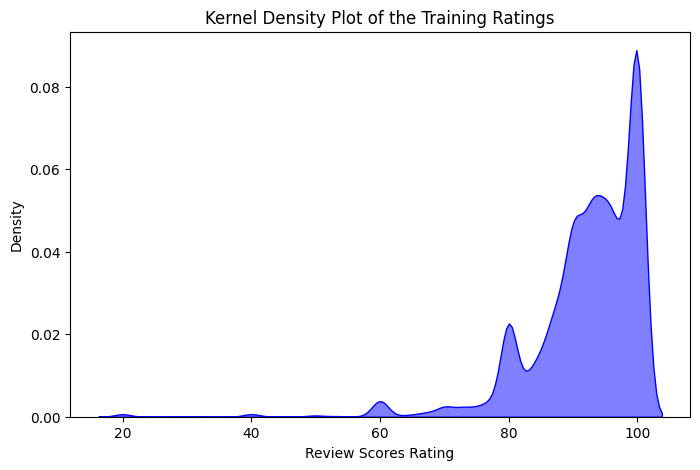

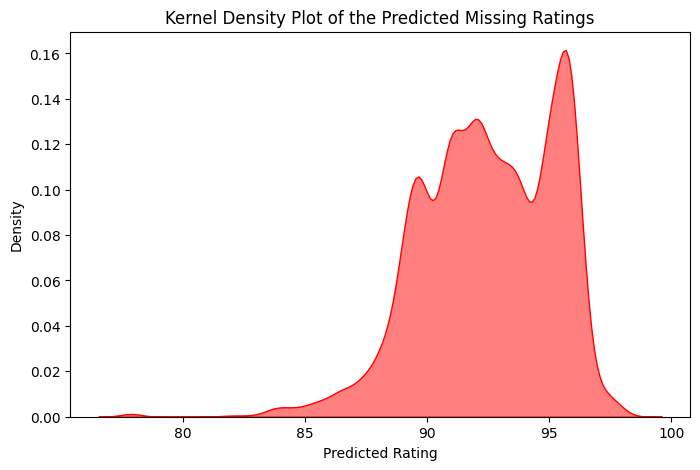

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

#kernel density plot of the training ratings
plt.figure(figsize=(8, 5))
sns.kdeplot(y_train, fill=True, color="blue", alpha=0.5)
plt.title("Kernel Density Plot of the Training Ratings")
plt.xlabel("Review Scores Rating")
plt.ylabel("Density")
plt.show()

#kernel density plot of the predicted missing ratings
predicted_missing_ratings = final_knn.predict(missing_scaled)
plt.figure(figsize=(8, 5))
sns.kdeplot(predicted_missing_ratings, fill=True, color="red", alpha=0.5)
plt.title("Kernel Density Plot of the Predicted Missing Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Density")
plt.show()


The plots have a somewhat similar shape, with both skewed left. This shows that, for the most part, more guests left ratings when the ratings were somewhat high/positive. We see that for the kernel density plot of the training ratings, there are the highest density of ratings that are around 100. In contrast, the kernel density plot of predicted missing ratings is a bit more of an even distribution, with the highest density when the predicted ratings are around 96. This may occur for several reasons. For example, the distribution of the missing rating data may be more likely to be missing from less enthusiastic reviews (reflecting in the density peaks around 92 and 96). This causes the predicted rating plot to be shifted towards the left, toward more moderate reviews. This may be because guests that have neither had an atrocious or amazing expirience are less likely to take the time to leave a review.

# Visualization

# Q1.

The "relevant" variables for this question are:

level - Level of institution (4-year, 2-year)

aid_value - The average amount of student aid going to undergraduate recipients

control - Public, Private not-for-profit, Private for-profit

grad_100_value - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

**1. Load the ./data/college_completion.csv data with Pandas.**

In [1]:
! git clone https://github.com/ds4e/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 35 (delta 6), reused 1 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (35/35), 7.16 MiB | 10.45 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [9]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
college = pd.read_csv('/content/visualization/assignment/data/college_completion.csv', low_memory = False)

**2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.**

In [6]:
print(college.shape) #print dimensions of data
print(college.head) #use head to examine first few rows, find out which variables are included
print("Number of Observations:", college.shape[0]) #find the number of observations

(3798, 63)
<bound method NDFrame.head of       index  unitid                                chronname             city  \
0         0  100654                   Alabama A&M University           Normal   
1         1  100663      University of Alabama at Birmingham       Birmingham   
2         2  100690                       Amridge University       Montgomery   
3         3  100706      University of Alabama at Huntsville       Huntsville   
4         4  100724                 Alabama State University       Montgomery   
...     ...     ...                                      ...              ...   
3793   3793  461528                Grace College of Divinity     Fayetteville   
3794   3794  462354  John Paul the Great Catholic University        Escondido   
3795   3795  466921  Chamberlain College of Nursing-Missouri        St. Louis   
3796   3796  474881              Minneapolis Media Institute            Edina   
3797   3797  475291            Brown College-Brooklyn Center  Brookl

**3. Cross tabulate control and level. Describe the patterns you see.**

In [7]:
cross_tab_college = pd.crosstab(college['control'], college['level'])
print(cross_tab_college)

level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632


From the results of cross tabulating control and level, I see several patterns. First, I see that there are more 2-year instutions (962) for public colleges than 4 year-institutions (632). In contrast, for private for-profit and private not-for profit institutions, there are more 4-year institutions (527 and 1180, respectively) compared to 2-year institutions (465 and 68, respectively). As noted, the difference between the number of 4-year and 2-year institutions is much greater in private not-for-profit institutions. In other words, there are many more 4 year colleges than 2 year colleges, compared to a much smaller difference in private for-profit institutions. The vast majority of private not-for-profit institutions are 4 year (1180).  

**4. For grad_100_value, create a histogram, kernel density plot, boxplot, and statistical description.**

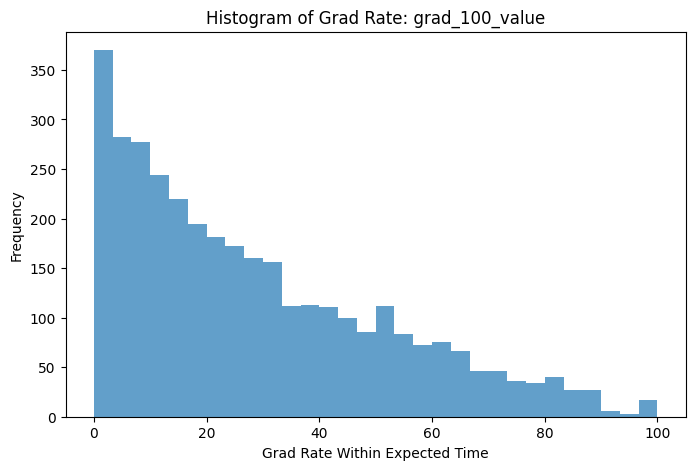

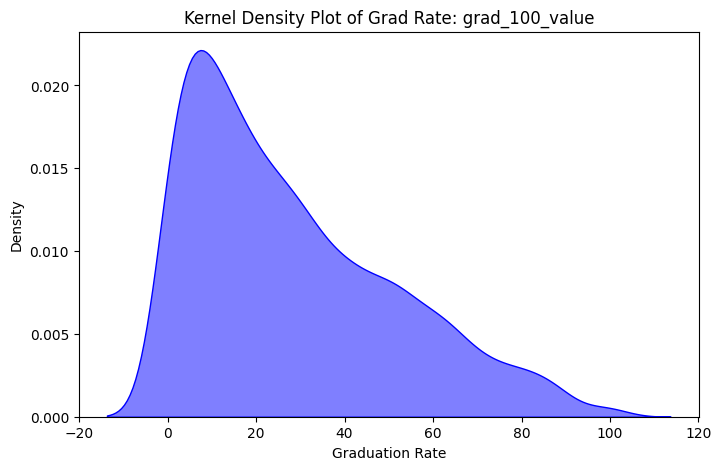

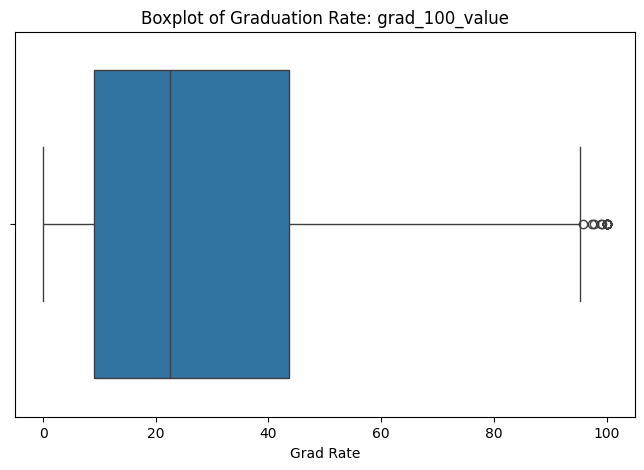

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


In [12]:
#histogram
plt.figure(figsize=(8, 5))
plt.hist(college['grad_100_value'], bins=30, alpha=0.7)
plt.title('Histogram of Grad Rate: grad_100_value')
plt.xlabel('Grad Rate Within Expected Time')
plt.ylabel('Frequency')
plt.show()

#kernel density plot
plt.figure(figsize=(8, 5))
sns.kdeplot(college['grad_100_value'], fill=True, color='blue', alpha=0.5)
plt.title('Kernel Density Plot of Grad Rate: grad_100_value')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.show()

#boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=college['grad_100_value'])
plt.title('Boxplot of Graduation Rate: grad_100_value')
plt.xlabel('Grad Rate')
plt.show()

#statistical description
print(college['grad_100_value'].describe())

**5. For grad_100_value, create a grouped kernel density plot by control and by level. Describe what you see. Use groupby and .describe to make grouped calculations of statistical descriptions of grad_100_value by level and control. Which institutions appear to have the best graduation rates?**

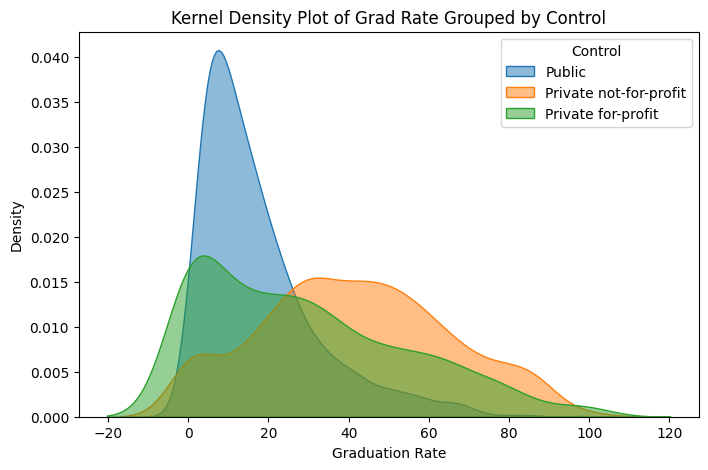

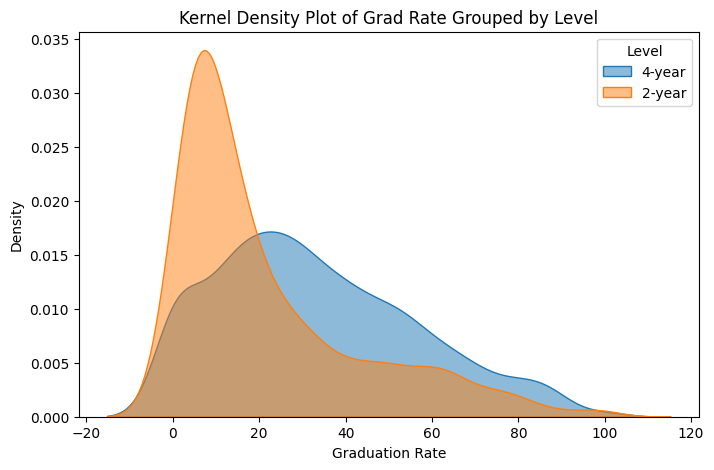

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

#kernel density plot by control
plt.figure(figsize=(8, 5))
for control_type in college['control'].unique():
    subset = college[college['control'] == control_type]
    sns.kdeplot(subset['grad_100_value'], label=control_type, fill=True, alpha=0.5)
plt.title('Kernel Density Plot of Grad Rate Grouped by Control')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.legend(title="Control")
plt.show()

#kernel density plot by level
plt.figure(figsize=(8, 5))
for level_type in college['level'].unique():
    subset = college[college['level'] == level_type]
    sns.kdeplot(subset['grad_100_value'], label=level_type, fill=True, alpha=0.5)
plt.title('Kernel Density Plot of Grad Rate Grouped by Level')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.legend(title="Level")
plt.show()

From these kernel density plots, I can make several observations. First, I see that the plot of graduation rate grouped by control is skewed right for public and private for-profit institutions, meaning that there is a higher density of lower graduation rates. Public institutions have a graduation rate of about 15% within the expected time. Private for-profit institutions have a wider spread, but also peak ar low graduation rates. Private not-for-profit institutions have a more normal variation, with a density peaking around 50% graduation rate in the expected time. This may be because not-for-profit institutions encourage students more to finish within 4 years, as they are not adding barriers to increase their tuition profits. Additionally, we see from the second plot that there is lower graduation rates for 2-year institutions, with a more narrow distribution. These students may have lower graduation rates, as they are more likely to have less desire/motivation to complete the degree, or have higher transfer rates to different 4-year or alternative institutions.

In [19]:
# Grouped Statistical Descriptions
grouped_stats = college.groupby(['control', 'level'])['grad_100_value'].describe()
print(grouped_stats)

                                count       mean        std  min     25%  \
control                level                                               
Private for-profit     2-year   461.0  37.197614  25.497380  0.0  15.800   
                       4-year   318.0  17.382704  20.788525  0.0   0.000   
Private not-for-profit 2-year    68.0  41.913235  28.348302  0.0  16.225   
                       4-year  1121.0  41.645674  23.243453  0.0  25.000   
Public                 2-year   926.0  12.400000  10.893600  0.0   5.100   
                       4-year   573.0  25.561082  16.403902  0.0  13.600   

                                50%     75%    max  
control                level                        
Private for-profit     2-year  33.9  57.800  100.0  
                       4-year  12.5  26.325  100.0  
Private not-for-profit 2-year  44.4  61.200  100.0  
                       4-year  41.0  57.800  100.0  
Public                 2-year   9.4  16.175   97.8  
                    

The summary statistics align with the kernel density plots. We see that private not-for-profit institutions have the highest graduation rates of a mean of 41.9% for 2-year programs and 41.6% for 4-year programs. Private for-profit universities have lower graduation rates with a mean of 37.2% for 2-year programs and 17.4% for 4-year programs, while public institutions have a lower 2-year rate of 12.4% and a hgiher 4-year rate of 25.6%.

**6. Create a new variable, df['levelXcontrol']=df['level']+', '+df['control'] that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?**

In [28]:
college['level_and_control'] = college['level'] + ', ' + college['control'] #create a new variable that interacts level and control

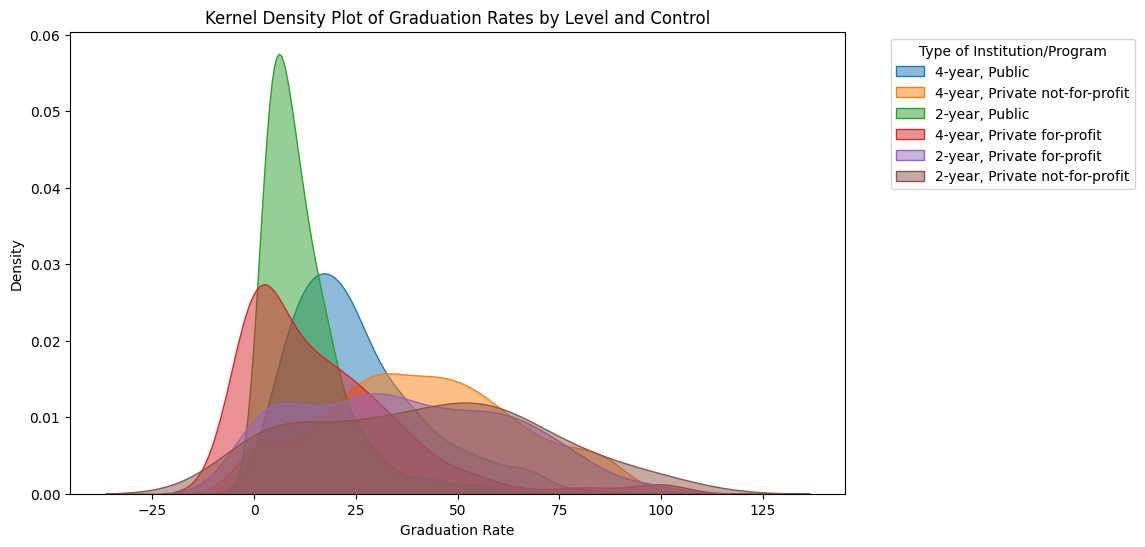

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

#create a grouped kernel density plot
plt.figure(figsize=(10, 6))
for level_and_control_type in college['level_and_control'].unique():
    subset = college[college['level_and_control'] == level_and_control_type]
    sns.kdeplot(subset['grad_100_value'], label=level_and_control_type, fill=True, alpha=0.5)

plt.title('Kernel Density Plot of Graduation Rates by Level and Control')
plt.xlabel('Graduation Rate')
plt.ylabel('Density')
plt.legend(title="Type of Institution/Program", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

2 year, private not-for-profit institutions tend to have the highest graduation rates, as they are more skewed to the left compared to the other institutions, peaking with a density around 50% graduation rate. 4 year, private not-for-profit institutions may have the second highest graduation rate, as the distribution appears centered and normal. Although the 2-year, private-for-profit distribution also appears normal, all of the other institution types appear skewed right, meaning that they have higher densities of lower graduation rates.

**7. Make a kernel density plot of aid_value. Now group your graph by level and control. What explains the shape of the graph? Use groupby and .describe to make grouped calculations of statistical descriptions of aid_value by level and control.**

**8. Make a scatterplot of grad_100_value by aid_value. Describe what you see. Now make the same plot, grouping by level and then control. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?**